In [1]:
import atomica as at
import numpy as np
import matplotlib.pyplot as plt

Created by Phillip Luong 

On: 10/03/21 12:41pm

Last Updated: 10/03/21 1:02pm

# Modelling the Syphilis Epidemic via ATOMICA

### Phillip Luong

# Epidemiology of Syphilis

![treponema pallidum](images_presentation/teponema.png)

- Causative Agent: _Treponema pallidum spp. Pallidum_
- 4 Stages: Primary, Secondary, Latent, Tertiary
- Symptoms:
    - Primary: ulcers/chancres (often painless)
    - Secondary: maculopapular rash, fever, malaise
- Testing: Serology tests (_Treponemal & Non-Treponemal_)
- Treatment: _Penicillin_

General epidemiology stats:

| __Description__ | __Value__ |
|:-|-:|
| Estimated GBM population | 42,859 (2014) |
| # Participants in VPCNSS | 25,507 (59.5%) |
| Estimated # of sex acts /week | 2 |
| Testing sensitivity | 0.95 |

Detailed stats (between HIV- and HIV+ individuals):

| __Description__ | __HIV-negative__ | __HIV-positive__ |
|-|-|-|
| Prevalence of Syphilis | 3.32% | 18.65% |
| % of pop who takes >= 2 tests | 53.55% | 92.18% |
| Average Testing Freq (tests/year) | 2.76 | 1.34 |
| Probability of Transmission per act | 1.4% | 5.6% |

# The model:
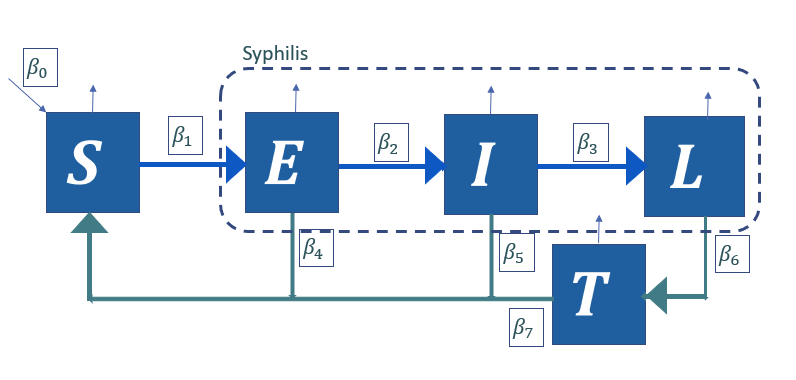

- S: Susceptible
- E: Exposed
- I: Infectious
- L: Latent
- T: Treatment

## Model separated by HIV-status

![HIV Model](images_presentation/basic_HIV_diagram.png)

## Model separated by HIV-status

![HIV Model](images_presentation/HIV_compartment_diagram.png)

- 

## Model separated by HIV-status

![HIV Model with syphilis](images_presentation/HIV_diagram_with_syp.png)

# Building The Model

The following frameworks and databooks were created using the template provided in Atomica.

In [2]:
F = at.ProjectFramework('syphilis_neg_framework_v01.xlsx')
D = at.ProjectData.from_spreadsheet('syphilis_neg_databook_v01_1.xlsx',framework=F)
P = at.Project(framework = F, databook= D)

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0169s


__(Not something I'm comfortable with yet, but I'd love to include some code here that will let me show the skeleton of the model, or at least some parameters)__

### Syphilis Framework

#### Parameters

![parameters](images_presentation/sup_model_framework_parameters.png)

#### Compartments

![compartments](images_presentation/syp_model_framework_compartments.png)


#### Transitions

![transitions](images_presentation/sup_model_framework_transitions.png)

### Syphilis Databook

#### Flows

![flows](images_presentation/syp_model_data_flows.png)

#### Flows

![stocks](images_presentation/syp_model_data_stocks.png)

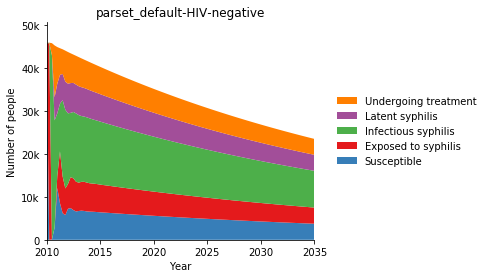

In [3]:
d = at.PlotData(P.results[0], project=P)
at.plot_series(d, plot_type='stacked');

# Tests to Implement

There are a number of tests (programs) I wish to implement into this model to observe the effect of the epidemic.
These include:

## Increasing syphilis testing frequency and frequency

In the model, we have a way to account for the number of people testing for syphilis, and how often they do. We assume that all people are likely to get tested for syphilis, no matter which part of the model they are in. 

We assume that syphilis tests are 100% accurate and that 100% of positive results are subsequently treated. 

In [4]:
freq = at.ParameterScenario(name = 'Increase Testing Frequency')
freq.add('test_rate','neg',2015, 2)

res_f = freq.run(P,P.parsets[0])

cov = at.ParameterScenario(name = 'Increase Coverage')
cov.add('prop_test','neg',2015, 0.9)

res_c = cov.run(P,P.parsets[0])

both = at.ParameterScenario(name = 'Increase Coverage and Frequency')
both.add('test_rate','neg', 2015, 2)
both.add('prop_test','neg',2015, 0.9)

res_b = both.run(P,P.parsets[0])

Elapsed time for running "default": 0.0568s
Elapsed time for running "default": 0.0160s
Elapsed time for running "default": 0.0170s


Text(0.5, 1.0, 'Infection flow (people/year)')

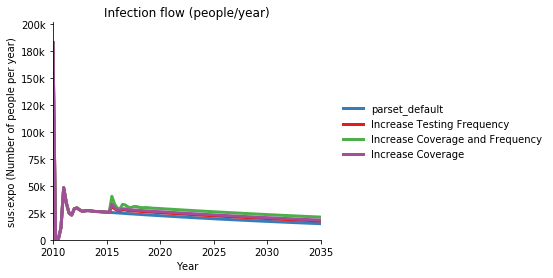

In [5]:
d = at.PlotData([P.results[0],res_f,res_b,res_c],'sus:expo')
at.plot_series(d, axis='results');
plt.title('Infection flow (people/year)')

## Condom Usage

There is also a way in the model to account for condom usage and efficiency, when calculating syphilis transmission. 

__[include formula of condom usage and efficiency part of the model]__

Here, we can analyse the effect of changes in condom usage within the population and how much it affect syphilis incidence. 

In [6]:
cndm = at.ParameterScenario(name='Increase Condom Usage')
cndm.add('cndm','neg',2015,0.8)

res_cn = cndm.run(P,P.parsets[0])

Elapsed time for running "default": 0.0170s


Text(0.5, 1.0, 'Infection flow (people/year)')

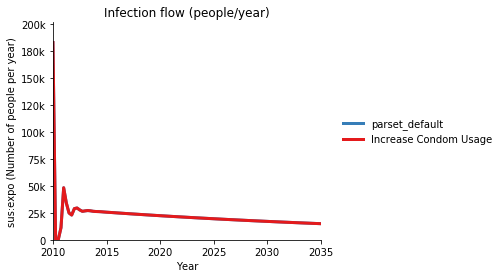

In [7]:
d = at.PlotData([P.results[0],res_cn],'sus:expo')
at.plot_series(d, axis='results');
plt.title('Infection flow (people/year)')

## PrEP Adherence

Of course, the main reason we account for condom usage is that we expect condom usage to decrease when PrEP adherence increases (alongside increased serodiscordant sex). This is another test we can eventually implement once I manage to include the PrEP users and the HIV-positive population into the model. 

# Issues with model development

### Timestep

- Model is now simulated yearly, instead of daily, giving potentially weird parameterisations

### Burn-in period

[<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>]

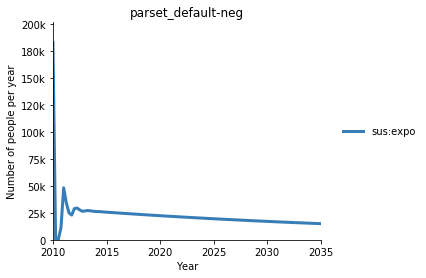

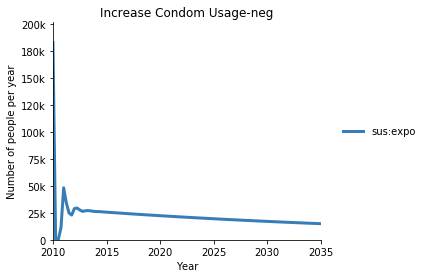

In [8]:
at.plot_series(d, data=P.data)

### Issues with calibration

In [9]:
P.parsets[0].get_par('b_rate').y_factor

#0: "neg": 1.0


In [10]:
P.parsets[0].get_par('infx').y_factor

#0: "neg": 1.0


Elapsed time for running "default": 0.0112s
Elapsed time for running "default": 0.0110s


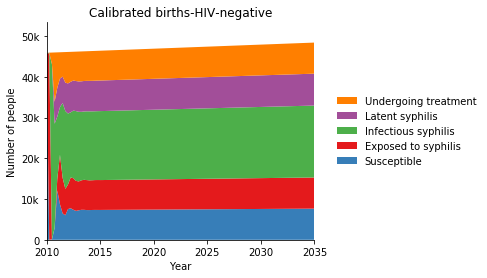

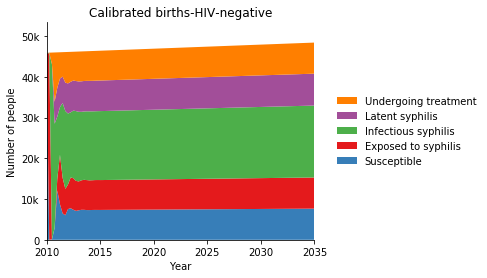

In [11]:
with at.Quiet():
    p4 = P.calibrate(max_time=10, parset='default',adjustables=['b_rate','doth_rate'], measurables=['sus']);
    
r4 = P.run_sim(parset=p4, result_name = 'Calibrated births')
d = at.PlotData(r4,project=P)
at.plot_series(d, plot_type='stacked');
with at.Quiet():
    p4 = P.calibrate(max_time=10, parset='default',adjustables=['b_rate','doth_rate'], measurables=['sus']);
    
r4 = P.run_sim(parset=p4, result_name = 'Calibrated births')
d = at.PlotData(r4,project=P)
at.plot_series(d, plot_type='stacked'); 

In [12]:
p4.pars['b_rate'].y_factor

#0: "neg": 2.0


In [13]:
p4.pars['doth_rate'].y_factor

#0: "neg": 0.0


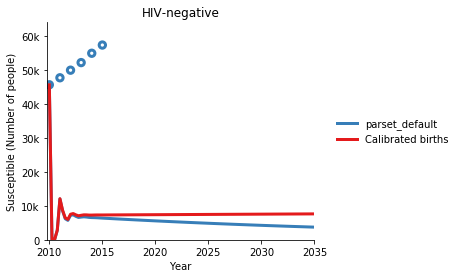

In [14]:
d = at.PlotData([P.results[0],r4], outputs='sus',project=P)
at.plot_series(d, axis='results', data=P.data);

### HIV Transitions

- __[have yet to add HIV transitions; will need to spend some more time to think about this]__
- Can either have it as a interaction/transfer between populations __(use mathematical formulation to explain this)__

### Issues with Programs

In [15]:
pset = P.load_progbook('syphilis_opt_out_testing.xlsx')
instructions = at.ProgramInstructions(start_year=2015)

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [16]:
res_baseline = P.run_sim(P.parsets[0], result_name='Baseline')
res_programs = P.run_sim(P.parsets[0], progset=P.progsets[0], progset_instructions=instructions,result_name='Opt-out Program')

Elapsed time for running "default": 0.0180s


Negative transition occurred
Negative transition occurred


Elapsed time for running "default": 0.0319s


Text(0.5, 1.0, 'Infection flow (people/year)')

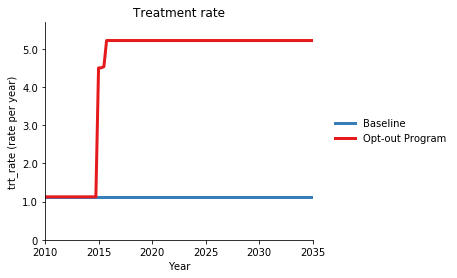

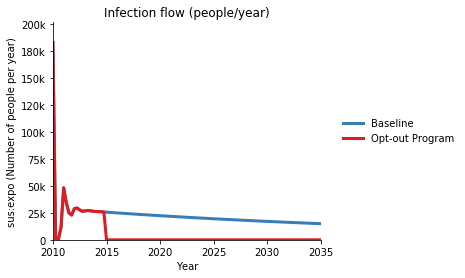

In [17]:
d = at.PlotData([res_baseline, res_programs], 'trt_rate')
at.plot_series(d, axis='results')
plt.title('Treatment rate');

d = at.PlotData([res_baseline, res_programs], 'sus:expo')
at.plot_series(d,axis='results')
plt.title('Infection flow (people/year)')

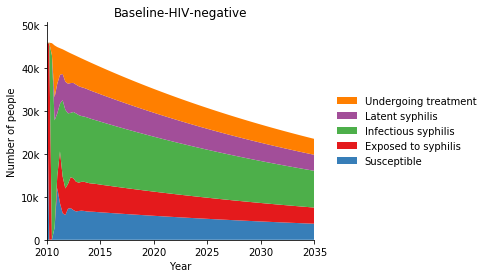

In [18]:
d = at.PlotData(res_baseline, project=P)
at.plot_series(d, plot_type='stacked');

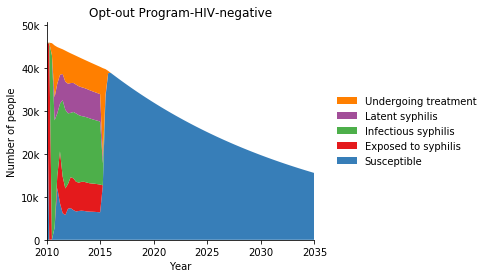

In [19]:
d = at.PlotData(res_programs, project=P)
at.plot_series(d, plot_type='stacked');

I suspected the biggest reason for this is because the model I developed in 2015/16 did not include factors for resource allocation, which makes the whole process for programs a bit wonky.